In [1]:
from scipy.stats import entropy , pearsonr
from algorithms import *
from datasets import *
from data_gen import *
import scanpy as sc
import numpy as np

In [2]:
def simulate_cyclic_random_k(ngenes, nmut, k_down=1,k_up=None):
    v0 = np.random.choice([-1, 1], ngenes)
    V = sample_all_cyclic_random_k(v0, nmut, k_down,k_up)
    return V

def sample_all_cyclic_random_k(v, nmut,k_down=1,k_up=None, include_start=False):
    if k_up==None:
        k_up = int(len(v)/10)
    V = []
    ngenes = len(v)
    if include_start:
        V.append(copy.deepcopy(v))
    for j in range(nmut):
        k = random.randint(k_down, k_up)
        ix = np.random.choice(ngenes, k)
        v[ix] = (v[ix] ) *-1
        V.append(copy.deepcopy(v))
    first_cell= V[0]
    last_cell = V[-1]
    diff_list = []
    for i in range(len(V[0])):
        if first_cell[i] != last_cell[i]:
            diff_list.append(i)
    k = random.randint(k_down, k_up)
    while len(diff_list) // k !=0:
        k = random.randint(k_down, k_up)
        ix = np.unique(np.random.choice(diff_list, k))
        new_cell = copy.deepcopy(V[-1])
        new_cell[ix] = (V[-1][ix]) *-1
        V.append(new_cell)
        for j in ix:
            diff_list.remove(j)
    return V


In [3]:
for i in range(20):
    A = simulate_cyclic_random_k(500, 100,k_down=1, k_up=20)#, w=0.3)
    A = np.clip(A,0,1)
    A = np.array(A)
    E , E_recon = reconstruction_cyclic(A)

Iteration number: 
0
 function value= 
5.326327142357288e-26
Iteration number: 
25
 function value= 
292.4827653509635
Iteration number: 
50
 function value= 
317.7717176076442
Iteration number: 
75
 function value= 
321.17709443114535
Iteration number: 
100
 function value= 
323.3778860135578
Iteration number: 
125
 function value= 
322.11519033155685
Iteration number: 
150
 function value= 
324.3834491740609
Iteration number: 
175
 function value= 
322.7959095207208
Iteration number: 
200
 function value= 
324.7488104777716
Iteration number: 
225
 function value= 
322.6274636549414
Iteration number: 
250
 function value= 
323.1173869307744
Iteration number: 
275
 function value= 
325.15153949412763
Iteration number: 
0
 function value= 
5.681165260288494e-26
Iteration number: 
25
 function value= 
188.97723181451394
Iteration number: 
50
 function value= 
255.9363582492962
Iteration number: 
75
 function value= 
256.7020367360799
Iteration number: 
100
 function value= 
256.965444409

Iteration number: 
175
 function value= 
347.1698606128382
Iteration number: 
200
 function value= 
347.7228840060993
Iteration number: 
225
 function value= 
348.403772750059
Iteration number: 
250
 function value= 
348.24067105688306
Iteration number: 
275
 function value= 
350.8506746709934
Iteration number: 
0
 function value= 
1.6601918405021607e-26
Iteration number: 
25
 function value= 
310.44330948149036
Iteration number: 
50
 function value= 
341.202424067256
Iteration number: 
75
 function value= 
344.0301234165098
Iteration number: 
100
 function value= 
345.7157117208202
Iteration number: 
125
 function value= 
346.70989127953715
Iteration number: 
150
 function value= 
347.376307484018
Iteration number: 
175
 function value= 
347.3922814819688
Iteration number: 
200
 function value= 
348.5184911540724
Iteration number: 
225
 function value= 
348.6777303278318
Iteration number: 
250
 function value= 
348.9393671916242
Iteration number: 
275
 function value= 
349.17562659258

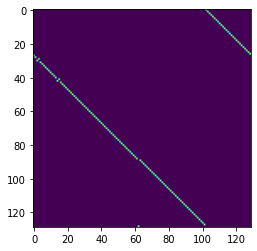

In [4]:
plt.imshow(E_recon)

In [5]:
##Figure B, reconstruction
noise_list =[]

corr_list = []
snr_list = []
for i in range(2,125):
        print("Iteration number: " + str(i))
        K = simulate_cyclic_random_k(500, 100,k_down=1, k_up=i)#, w=0.3)        
        K = np.array(K)
        noise = np.random.normal(0,0.1 ,(K.shape))
        noise = np.clip(noise,0,np.inf)
        K = K + noise
        E_sga  , E_rec_sga = reconstruction_cyclic(K,iterNum=100 , verbose=False)
        res = spearm(E_rec_sga,np.array(range(K.shape[0])))
        corr_list.append(res)
        print(res)

Iteration number: 2
0.9673560580545614
Iteration number: 3
0.9991603330967261
Iteration number: 4
0.9937888536721395
Iteration number: 5
0.9580979725770538
Iteration number: 6
0.9653633499408826
Iteration number: 7
0.9997505168408739
Iteration number: 8
0.9999893328592383
Iteration number: 9
0.9910304771282722
Iteration number: 10
0.9655391214978327
Iteration number: 11
0.9839983913490323
Iteration number: 12
0.9456997302966735
Iteration number: 13
0.985860494410329
Iteration number: 14
0.9939288908765654
Iteration number: 15
0.9592023083385075
Iteration number: 16
0.9685674015718632
Iteration number: 17
0.9749187419886467
Iteration number: 18
0.987163555422032
Iteration number: 19
0.97615698698603
Iteration number: 20
0.9528874901652241
Iteration number: 21
0.9993610667407459
Iteration number: 22
0.9679160104986877
Iteration number: 23
0.9704988198269078
Iteration number: 24
0.9753486943164361
Iteration number: 25
0.952899506910202
Iteration number: 26
0.97282769472856
Iteration numbe

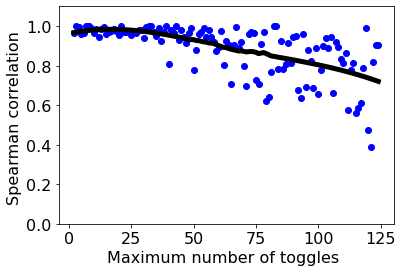

In [6]:
plt.plot(range(2,125),corr_list, 'bo', range(2,125),savgol_filter(np.array(corr_list),87,3), 'k', linewidth=5.0)
plt.xlabel("Maximum number of toggles ",  fontsize=16)
plt.ylabel("Spearman correlation ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim([0,1.1])
plt.show()


In [7]:
corr2_list = []
for i in range(2,125):
        print("Iteration number: " + str(i))
        K = simulate_cyclic_k(500, 100, i)#, w=0.3)        
        K = np.array(K)
        noise = np.random.normal(0,0.1 ,(K.shape))
        noise = np.clip(noise,0,np.inf)
        K = K + noise
        E_sga  , E_rec_sga = reconstruction_cyclic(K,iterNum=100 , verbose=False)
        res = spearm(E_rec_sga,np.array(range(K.shape[0])))
        corr2_list.append(res)
        print(res)

Iteration number: 2
1.0
Iteration number: 3
0.9957928044064223
Iteration number: 4
0.9999964442864128
Iteration number: 5
0.9999058178860396
Iteration number: 6
0.9949595603020688
Iteration number: 7
0.9810295752950898
Iteration number: 8
0.9817139982110914
Iteration number: 9
0.9923468246869411
Iteration number: 10
0.9906144544431946
Iteration number: 11
0.9777014813909147
Iteration number: 12
0.9856586291103393
Iteration number: 13
0.953462045975415
Iteration number: 14
1.0
Iteration number: 15
0.969410449968775
Iteration number: 16
0.9954253642409565
Iteration number: 17
1.0
Iteration number: 18
1.0
Iteration number: 19
0.9417589761244205
Iteration number: 20
1.0
Iteration number: 21
0.9035688659582465
Iteration number: 22
0.9848720401817749
Iteration number: 23
0.9686732186732185
Iteration number: 24
1.0
Iteration number: 25
0.900061425061425
Iteration number: 26
1.0
Iteration number: 27
1.0
Iteration number: 28
0.9999999999999999
Iteration number: 29
1.0
Iteration number: 30
0.989

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_4621/2300060363.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,125),corr2_list, 'bo', color='g')#, range(2,125),savgol_filter(np.array(corr2_list),87,3), 'k', linewidth=5.0,label='Fixed k')
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_4621/2300060363.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,125),corr_list, 'bo', color='r')


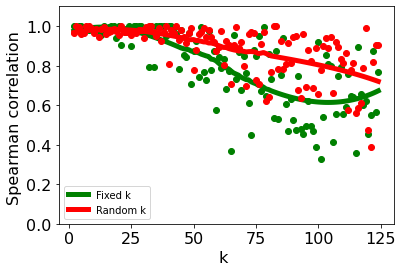

In [8]:
plt.plot(range(2,125),corr2_list, 'bo', color='g')#, range(2,125),savgol_filter(np.array(corr2_list),87,3), 'k', linewidth=5.0,label='Fixed k')
plt.plot(range(2,125),savgol_filter(np.array(corr2_list),87,3), 'g', linewidth=5.0,label='Fixed k')
plt.plot(range(2,125),corr_list, 'bo', color='r')
plt.plot( range(2,125),savgol_filter(np.array(corr_list),87,3), 'r', linewidth=5.0 , label='Random k')
plt.xlabel("k ",  fontsize=16)
plt.ylabel("Spearman correlation ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim([0,1.1])
plt.legend()
plt.show()


In [9]:
ngenes=500
A = simulate_cyclic_k(ngenes, 100, 2)#, w=0.3)        
A = cell_normalization(A)
n = A.shape[0]
p = A.shape[1]
corr_fixed_list =[]
corr_dynamic_list =[]
alpha = np.exp(-4/ngenes)

for i in range(2,50):
    print(i)
    A = simulate_cyclic_k(ngenes, 100, 2)
    A = cell_normalization(A)
    n = A.shape[0]
    V = generate_spectral_matrix(n=n, alpha=alpha)
    E = sga_matrix_momentum(A, E=np.ones((n, n)) , V=V.T, iterNum=100, batch_size=int(A.shape[0]*0.75) , verbose=False)
    E_recon = reconstruct_e(E)
    res = spearm(E_recon,np.array(range(A.shape[0])))
    corr_fixed_list.append(res)
    print(res)
    E_sga  , E_rec_sga = reconstruction_cyclic(A,iterNum=100 , verbose=False)
    res = spearm(E_rec_sga,np.array(range(A.shape[0])))
    corr_dynamic_list.append(res)
    print(res)


2
0.9485972112223103
0.9441380468956249
3
0.9638116194461336
0.9803508301812898
4
0.9980177917879947
0.9851307669703204
5
0.9917978028956833
0.9999706889918847
6
0.9797408645808455
1.0
7
0.9952620498324272
0.9970250080343149
8
0.9608045110117891
0.9989724692626583
9
0.9560986524787431
0.999997513798419
10
0.9868817049463606
0.9980320157438741
11
0.9921510616080754
0.9999080105414949
12
0.9464582023560453
0.9646722046440681
13
0.9442201518288477
0.9999942489072926
14
0.9431854959361509
0.9607061510371824
15
0.990028842775038
0.9967148008480671
16
0.985177254477633
0.9948107861841168
17
0.9266997864017089
0.9655194758441933
18
0.9966712266301871
0.9983080135358919
19
0.9896986720059996
0.9763833565632052
20
0.9815847048878723
0.9997364626323904
21
0.9996532716477443
0.9639579674125968
22
0.9997480020159839
0.9966112271101832
23
0.9694445825667546
0.999997513798419
24
0.9914926611619712
0.9990450668589227
25
0.9958397263258412
0.991125522062198
26
0.9982825834024783
0.9651000551612889
27


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_4621/3456014897.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,50),corr_fixed_list, 'bo', color='g',label='Fixed k')#, range(2,125),savgol_filter(np.array(corr2_list),87,3), 'k', linewidth=5.0,label='Fixed k')
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_4621/3456014897.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,50),corr_dynamic_list, 'bo', color='r' , label='Estimated k')


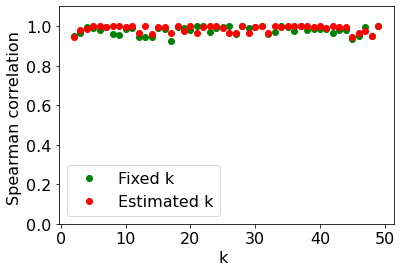

In [10]:
plt.plot(range(2,50),corr_fixed_list, 'bo', color='g',label='Fixed k')#, range(2,125),savgol_filter(np.array(corr2_list),87,3), 'k', linewidth=5.0,label='Fixed k')
#plt.plot(range(2,50),savgol_filter(np.array(corr_fixed_list),23,3), 'g', linewidth=5.0,label='Fixed k')
plt.plot(range(2,50),corr_dynamic_list, 'bo', color='r' , label='Estimated k')
#plt.plot( range(2,50),savgol_filter(np.array(corr_dynamic_list),23,3), 'r', linewidth=5.0 , label='Estimated k')
plt.xlabel("k ",  fontsize=16)
plt.ylabel("Spearman correlation ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim([0,1.1])
plt.legend(fontsize=16)
plt.show()


In [11]:
ngenes=500
A = simulate_cyclic_k(ngenes, 100, 2)#, w=0.3)        
A = cell_normalization(A)
n = A.shape[0]
p = A.shape[1]
corr_fixed_list =[]
corr_dynamic_list =[]
alpha = np.exp(-4/ngenes)

for i in range(2,100):
    print(i)
    A = simulate_cyclic_k(ngenes, 100, i)
    A = np.array(A)
    noise = np.random.normal(0,0.1 ,(A.shape))
    noise = np.clip(noise,0,np.inf)
    A = A + noise
    A = cell_normalization(A)
    n = A.shape[0]
    V = generate_spectral_matrix(n=n, alpha=alpha)
    E = sga_matrix_momentum(A, E=np.ones((n, n)) , V=V.T, iterNum=100, batch_size=int(A.shape[0]*0.75) , verbose=False)
    E_recon = reconstruct_e(E)
    res = spearm(E_recon,np.array(range(A.shape[0])))
    corr_fixed_list.append(res)
    print(res)
    E_sga  , E_rec_sga = reconstruction_cyclic(A,iterNum=100 , verbose=False)
    res = spearm(E_rec_sga,np.array(range(A.shape[0])))
    corr_dynamic_list.append(res)
    print(res)


2
0.9987600298519917
0.9999976822987888
3
0.9422604405266448
0.9572880810544188
4
0.9697202687279163
0.9779556995332116
5
0.9851916642977413
0.9989897443747131
6
0.969740438652118
0.9902429424241762
7
0.9570726587471969
0.9691331520442726
8
0.9954038328084129
0.983771953237602
9
0.9746383446255265
0.9838056216810108
10
0.9723914510686165
0.9739812523434572
11
0.9655212295247191
0.9709934208134927
12
0.992725490448982
0.9813042524925515
13
0.9816098340162509
0.9885130911868877
14
0.9857214072069508
0.9567155675829655
15
0.9999923115365396
1.0
16
0.9999615576826972
0.9989543689693615
17
1.0
0.9672087033406374
18
0.9999918997185153
0.945930621089083
19
0.9928588337410242
1.0
20
0.9997255306407612
0.9696004391509748
21
0.9770610153702842
1.0
22
1.0
1.0
23
1.0
0.9424359424359423
24
0.9892330642330642
0.9137504387504387
25
0.999981966954444
0.9999999999999999
26
0.9873137524513671
0.9914703694520208
27
0.993133166527662
1.0
28
0.9941618015012511
0.933426003150774
29
0.9284774348994533
0.8739

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_4621/259333684.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,100),corr_fixed_list, 'bo', color='g',label='Fixed k')#, range(2,125),savgol_filter(np.array(corr2_list),87,3), 'k', linewidth=5.0,label='Fixed k')
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_4621/259333684.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,100),corr_dynamic_list, 'bo', color='r' , label='Estimated k')


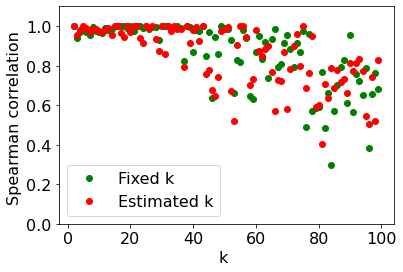

In [12]:
plt.plot(range(2,100),corr_fixed_list, 'bo', color='g',label='Fixed k')#, range(2,125),savgol_filter(np.array(corr2_list),87,3), 'k', linewidth=5.0,label='Fixed k')
#plt.plot(range(2,50),savgol_filter(np.array(corr_fixed_list),23,3), 'g', linewidth=5.0,label='Fixed k')
plt.plot(range(2,100),corr_dynamic_list, 'bo', color='r' , label='Estimated k')
#plt.plot( range(2,50),savgol_filter(np.array(corr_dynamic_list),23,3), 'r', linewidth=5.0 , label='Estimated k')
plt.xlabel("k ",  fontsize=16)
plt.ylabel("Spearman correlation ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim([0,1.1])
plt.legend(fontsize=16)
plt.show()


In [13]:
ngenes=500
A = simulate_cyclic_k(ngenes, 100, 2)#, w=0.3)        
A = cell_normalization(A)
n = A.shape[0]
p = A.shape[1]
corr_fixed_k_list =[]
corr_random_k_list =[]
for i in range(2,100):
    print(i)
    A = simulate_cyclic_k(ngenes, 100, i)
    A = np.array(A)
    noise = np.random.normal(0,0.1 ,(A.shape))
    noise = np.clip(noise,0,np.inf)
    A = A + noise
    E_sga  , E_rec_sga = reconstruction_cyclic(A,iterNum=100 , verbose=False)
    res = spearm(E_rec_sga,np.array(range(A.shape[0])))
    corr_fixed_k_list.append(res)
    print(res)
    A = simulate_cyclic_random_k(500, 100,k_down=1, k_up=i*2)#, w=0.3)        
    A = np.array(A)
    noise = np.random.normal(0,0.1 ,(A.shape))
    noise = np.clip(noise,0,np.inf)
    A = A + noise
    E_sga  , E_rec_sga = reconstruction_cyclic(A,iterNum=100 , verbose=False)
    res = spearm(E_rec_sga,np.array(range(A.shape[0])))
    corr_random_k_list.append(res)


2
0.9666708505739169
3
1.0
4
0.9883029766930694
5
0.9681644221221792
6
0.9927030130893698
7
0.9999951224270804
8
0.9885400592661375
9
1.0
10
0.9780539397144369
11
0.9768415214559338
12
0.990046956424042
13
0.9999999999999998
14
1.0
15
0.9781096271624687
16
1.0
17
1.0
18
1.0
19
0.9865698729582577
20
0.9953839244128021
21
0.9996156080226877
22
1.0
23
1.0
24
0.9756405756405756
25
0.9977799227799228
26
0.999972950431666
27
0.9986574236574235
28
0.849140049140049
29
0.7648688722083218
30
0.9719911972334162
31
0.9999999999999999
32
0.9715339106576352
33
0.9944944062383668
34
0.9979427496620232
35
0.7516213091949293
36
0.9972961852700876
37
0.9344422892298047
38
0.9543340806610071
39
1.0
40
0.7705015492354587
41
0.7030506083583142
42
0.6872610020908381
43
0.7444240118900673
44
0.9579313298234123
45
0.9999999999999999
46
0.805647781948258
47
0.9717157467818727
48
0.7800124403897989
49
0.9020782426883643
50
0.9206717810491396
51
0.5884822724445367
52
0.9982272444536595
53
0.9786647314949202
54


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_4621/1793256450.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,100),corr_fixed_k_list, 'bo', color='g',label='Fixed k')#, range(2,125),savgol_filter(np.array(corr2_list),87,3), 'k', linewidth=5.0,label='Fixed k')
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_4621/1793256450.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,100),corr_random_k_list, 'bo', color='r' , label='Varying k')


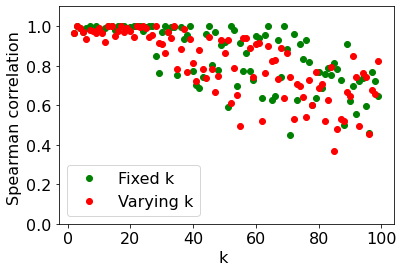

In [14]:
plt.plot(range(2,100),corr_fixed_k_list, 'bo', color='g',label='Fixed k')#, range(2,125),savgol_filter(np.array(corr2_list),87,3), 'k', linewidth=5.0,label='Fixed k')
#plt.plot(range(2,50),savgol_filter(np.array(corr_fixed_list),23,3), 'g', linewidth=5.0,label='Fixed k')
plt.plot(range(2,100),corr_random_k_list, 'bo', color='r' , label='Varying k')
#plt.plot( range(2,50),savgol_filter(np.array(corr_dynamic_list),23,3), 'r', linewidth=5.0 , label='Estimated k')
plt.xlabel("k ",  fontsize=16)
plt.ylabel("Spearman correlation ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim([0,1.1])
plt.legend(fontsize=16)
plt.show()
